In [1]:
## Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
%matplotlib inline

In [2]:
## Read Data
## Data Source: https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

lol_ranked_10_df = pd.read_csv("C:\\Users\\Admin\\Desktop\\upwork_jobs\\lol_project\\data\\high_diamond_ranked_10min.csv")

## Duplicate source data
lol_ranked_10_df_copy = lol_ranked_10_df.copy() 

In [3]:
lol_ranked_10_df_copy.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
## Win/Loss
lol_ranked_10_df_copy.value_counts('blueWins')

## Data is quite balanced

blueWins
0    4949
1    4930
dtype: int64

Understanding game statistics

It is expected to have some correlating variables, for example *high* kills would result in *high* killing spree, *high* multi kill, e.t.c

Ways to address this would be to pick one of the variable (kills) or aggregate them (kills*largestkillingspree) or we could perfrom dimensionality reduction on this dataset to find the core relationship between these attributes without manual intervention or the removal of potential key drivers.

In [5]:
## Determining correlation between various game statistics
corr_all = lol_ranked_10_df_copy.drop(['gameId','blueWins'], axis = 1).corr()

<AxesSubplot:>

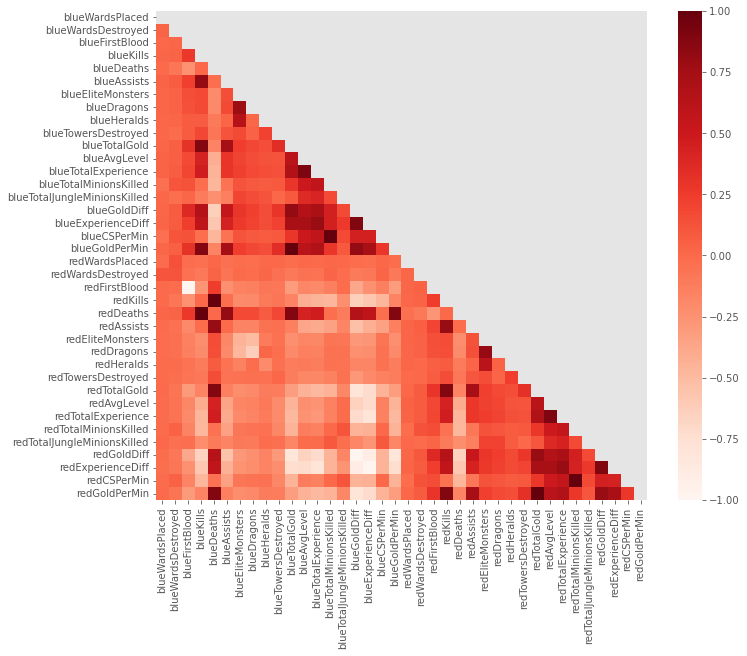

In [6]:
f, ax = plt.subplots(figsize = (11, 9))
mask = np.zeros_like(corr_all, dtype = bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, cmap="Reds", mask=mask)

In [7]:
num_features = 15
game_stat_df = lol_ranked_10_df_copy.drop(['gameId','blueWins'], axis = 1)

In [8]:
# Standardizing the features
df_std = pd.DataFrame(StandardScaler().fit_transform(game_stat_df))
df_std.columns = game_stat_df.columns

In [9]:
df_std.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0.316996,-0.379275,0.990429,0.935301,-0.046926,1.071495,-0.879231,-0.753226,-0.481132,-0.210439,...,-0.198353,0.052293,-0.410475,-0.763215,-0.928741,0.367685,-0.256228,-0.013342,-0.928741,0.052293
1,-0.570992,-0.839069,-1.009663,-0.393216,-0.387796,-0.404768,-0.879231,-0.753226,-0.481132,-0.210439,...,4.412301,0.758619,-0.410475,-0.436980,1.033784,0.068504,1.191254,0.593342,1.033784,0.758619
2,-0.404494,-1.298863,-1.009663,0.271042,1.657424,-0.650812,0.719503,1.327623,-0.481132,-0.210439,...,-0.198353,0.533909,-0.410475,-0.590502,-0.654900,-2.324944,0.483614,0.520436,-0.654900,0.533909
3,1.149484,-0.839069,-1.009663,-0.725346,-0.387796,-0.404768,0.719503,-0.753226,2.078430,-0.210439,...,-0.198353,-0.007406,0.244627,-0.000609,0.805583,-0.430131,0.544350,-0.013863,0.805583,-0.007406
4,2.925460,0.540312,-1.009663,-0.061087,-0.046926,-0.158724,-0.879231,-0.753226,-0.481132,-0.210439,...,-0.198353,0.613731,0.244627,0.293085,0.349182,1.564408,0.415133,-0.137283,0.349182,0.613731


In [10]:
# Fit all 15 components for variance plotting
pca = PCA(n_components= num_features)
principal_components = pca.fit_transform(df_std)
principal_df = pd.DataFrame(data = principal_components)
principal_df.columns = ['PC'+str(x+1) for x in range(num_features)]
pca_str = pca.explained_variance_ratio_

In [11]:
 cum_sum_eigenvalues = np.cumsum(pca_str)

In [12]:
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.752777,2.393919,-0.114726,1.820820,-1.669618,-0.474753,-1.219832,0.434775,0.745907,0.592353,1.140638,-0.482327,-0.011572,0.394581,1.310473
1,4.113111,-0.232675,1.841279,2.090242,-0.464073,-2.498079,4.538072,0.370264,-0.592516,-0.484780,-0.653550,-1.027311,1.119493,-1.513550,1.396857
2,2.176679,3.251619,-2.485291,2.136325,1.813148,-0.145678,-0.239827,-0.366458,-0.619523,-1.017622,0.060988,-0.591669,-0.578439,1.137855,-0.097999
3,1.251326,-0.988898,-1.714263,0.111806,1.623818,0.564291,0.537196,1.968502,-0.294990,-0.593529,0.548182,0.189813,0.397037,-0.368790,-0.292478
4,1.198084,-0.298521,1.631960,-0.906831,0.977694,-0.562030,-0.184612,1.474498,0.353115,0.295623,1.971910,1.605415,1.110684,-1.154949,-0.838476


In [13]:
principal_df.shape

(9879, 15)

In [14]:
lol_ranked_10_df_copy.shape

(9879, 40)

In [34]:
principal_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.752777,2.393919,-0.114726,1.820820,-1.669618,-0.474753,-1.219832,0.434775,0.745907,0.592353,1.140638,-0.482327,-0.011572,0.394581,1.310473
1,4.113111,-0.232675,1.841279,2.090242,-0.464073,-2.498079,4.538072,0.370264,-0.592516,-0.484780,-0.653550,-1.027311,1.119493,-1.513550,1.396857
2,2.176679,3.251619,-2.485291,2.136325,1.813148,-0.145678,-0.239827,-0.366458,-0.619523,-1.017622,0.060988,-0.591669,-0.578439,1.137855,-0.097999
3,1.251326,-0.988898,-1.714263,0.111806,1.623818,0.564291,0.537196,1.968502,-0.294990,-0.593529,0.548182,0.189813,0.397037,-0.368790,-0.292478
4,1.198084,-0.298521,1.631960,-0.906831,0.977694,-0.562030,-0.184612,1.474498,0.353115,0.295623,1.971910,1.605415,1.110684,-1.154949,-0.838476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,-3.552857,-0.554755,-1.643110,-0.156952,-0.096500,-0.754986,-0.108101,0.168457,0.118285,-2.400264,-1.358970,1.064876,0.314016,1.139347,0.269722
9875,-1.529951,-1.552413,-1.198992,-0.953584,1.662560,-0.689933,-0.769553,-0.032391,3.700254,0.116185,5.164189,-0.087167,-1.881456,3.010107,5.107752
9876,3.942824,-0.276517,1.097611,-2.252235,0.148167,-0.899292,-0.415435,1.668158,-1.287539,0.601583,-0.253368,-0.619887,0.587944,-0.042261,-0.764695
9877,1.024353,-3.631774,-2.611301,0.883666,-1.441635,-0.363956,-0.658284,-0.728841,1.552108,-0.010925,-1.710964,0.457134,0.623234,1.159560,0.259310


In [15]:
pca_full_df = pd.concat([lol_ranked_10_df_copy[['gameId','blueWins']], principal_df], axis=1)

In [16]:
 ## Original data with Principal Components attached 
 ## This can be a data normalization step for clustering with Kmeans
 pca_full_df.head()

,gameId,blueWins,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,4519157822,0,-0.752777,2.393919,-0.114726,1.820820,-1.669618,-0.474753,-1.219832,0.434775,0.745907,0.592353,1.140638,-0.482327,-0.011572,0.394581,1.310473
1,4523371949,0,4.113111,-0.232675,1.841279,2.090242,-0.464073,-2.498079,4.538072,0.370264,-0.592516,-0.484780,-0.653550,-1.027311,1.119493,-1.513550,1.396857
2,4521474530,0,2.176679,3.251619,-2.485291,2.136325,1.813148,-0.145678,-0.239827,-0.366458,-0.619523,-1.017622,0.060988,-0.591669,-0.578439,1.137855,-0.097999
3,4524384067,0,1.251326,-0.988898,-1.714263,0.111806,1.623818,0.564291,0.537196,1.968502,-0.294990,-0.593529,0.548182,0.189813,0.397037,-0.368790,-0.292478
4,4436033771,0,1.198084,-0.298521,1.631960,-0.906831,0.977694,-0.562030,-0.184612,1.474498,0.353115,0.295623,1.971910,1.605415,1.110684,-1.154949,-0.838476


In [ ]:
 # pca_full_df.to_csv("C:\\Users\\Admin\\Desktop\\upwork_jobs\\lol_project\\data\\lol_10_pca_merged_df.csv")

## Exploring PCA Result

About 30% of the variance was explained in the first principal component (PC) and about 10% of the variance was explained in the second PC and so on..

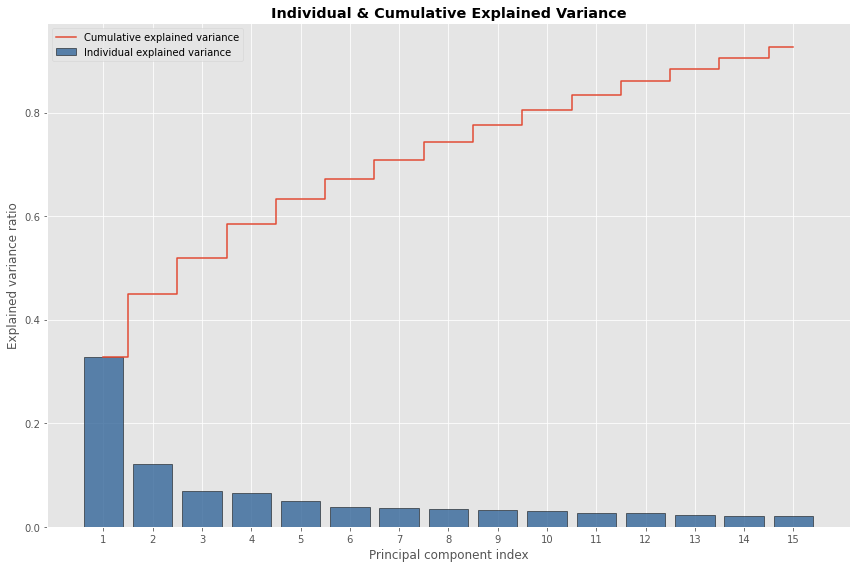

In [17]:
# Plot the variance of each PC
plt.figure(figsize=(12,8))

plt.bar(np.arange(1, num_features + 1),
        pca_str,
        color=(0.2, 0.4, 0.6, 0.8),
        edgecolor='black',
        label='Individual explained variance')

plt.xticks(np.arange(1, num_features + 1))

plt.step(range(1,len(cum_sum_eigenvalues)+1),
         cum_sum_eigenvalues,
         where='mid',
         label='Cumulative explained variance') 

plt.title('Individual & Cumulative Explained Variance',fontweight='bold')
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal component index')

plt.legend(loc='best') 
plt.tight_layout() 
plt.show()


In [18]:
# Create a table of all the feature strengths for each component
all_comps = []
for i in range(num_features):
    all_comps.append(pca.components_[i])
var_str = pd.DataFrame(all_comps, columns= game_stat_df.columns, index=range(1, num_features + 1)).abs().transpose()

In [19]:
# Preview
var_str.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
blueWardsPlaced,0.006140,0.009709,0.019539,0.011001,0.011073,0.035295,0.006430,0.120615,0.279257,0.077869,0.683370,0.356608,0.371733,0.143798,0.276464
blueWardsDestroyed,0.024779,0.025617,0.007498,0.047494,0.022718,0.063557,0.080039,0.099404,0.596890,0.126977,0.250266,0.044639,0.086292,0.421029,0.363934
blueFirstBlood,0.111815,0.012651,0.056161,0.008847,0.611491,0.174233,0.091224,0.076011,0.031626,0.231911,0.024794,0.016977,0.010432,0.007642,0.019252
blueKills,0.184303,0.309181,0.039863,0.102877,0.067406,0.144006,0.009690,0.105829,0.012291,0.094120,0.017713,0.013426,0.047797,0.019202,0.047473
blueDeaths,0.180071,0.316141,0.001983,0.109745,0.077715,0.107739,0.092782,0.089892,0.008836,0.101755,0.008694,0.007538,0.044436,0.024036,0.071158


In [20]:
actual_str = pd.DataFrame(all_comps, columns= game_stat_df.columns, index=range(1, num_features + 1)).transpose()

In [21]:
# Print out the strongest variables for the top 8 PCs
for i in range(1,9):
    print("")
    print("PC "+str(i))
    for j in range(4):
        key = var_str.sort_values(i, ascending=False)[i].keys()[j]
        if actual_str[actual_str.index == key][i].values[0] > 0:
            direction = 'High'
        else:
            direction = 'Low'
        print(direction, key)


PC 1
High redGoldDiff
Low blueGoldDiff
High redExperienceDiff
Low blueExperienceDiff

PC 2
High blueDeaths
High redKills
High blueKills
High redDeaths

PC 3
High redEliteMonsters
High redDragons
Low blueDragons
Low blueEliteMonsters

PC 4
Low redTotalExperience
Low blueTotalExperience
Low redAvgLevel
Low blueAvgLevel

PC 5
Low blueFirstBlood
High redFirstBlood
Low redTotalJungleMinionsKilled
High blueTotalJungleMinionsKilled

PC 6
High blueHeralds
High blueTowersDestroyed
Low redCSPerMin
Low redTotalMinionsKilled

PC 7
High redHeralds
High redTowersDestroyed
High redEliteMonsters
High blueEliteMonsters

PC 8
Low redHeralds
Low blueTotalMinionsKilled
Low blueCSPerMin
High blueHeralds
